<a href="https://colab.research.google.com/github/Rohanjos97/machine-learning-assignments/blob/main/Assignment%203/%20Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generate 100 real number for the variable X from the uniform distribution U [0, 1].

# 2. Construct the training set T = { ($x_1$,$y_1$), ($x_2$,$y_2$), ... , ($x_{100}$,$y_{100}$)} using the relation

# $Y_i$ = sin(2 π $x_i$) + $ε_i$ where $ε_i$ ~ N(0,0.25).

# 3. In the similar way construct a testing set of size 50 Test = { ($x'_1$,$y'_1$),($x'_2$,$y'_2$),......,($x'_{50}$,$y'_{50}$)}.

Text(0.5, 1.0, 'Testing Data')

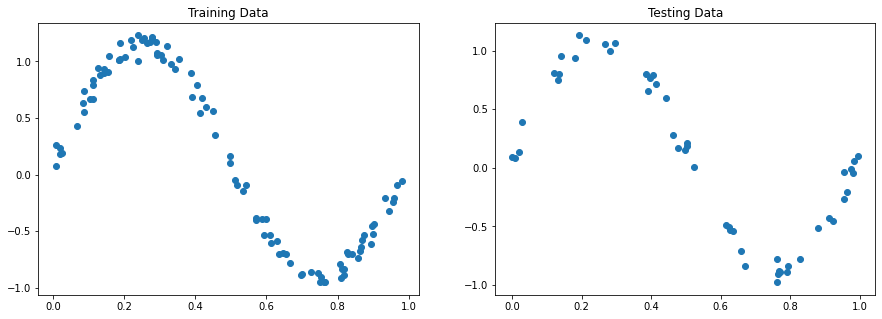

In [75]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# Train data

# Uniform distribution of training data
X_train = np.random.uniform(0, 1, 100)

Y_train = []
for xval in X_train:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_train.append(res)



# Test data

# Uniform distribution of testing data
X_test = np.random.uniform(0, 1, 50)

Y_test = []
for xval in X_test:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_test.append(res)


# Plotting the graph of train and test data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X_train, Y_train)
ax[0].set_title('Training Data')
ax[1].scatter(X_test, Y_test)
ax[1].set_title('Testing Data')

# Estimate the regularized Least Squares Polynomial Regression model of order M= 9, using the training set T using direct method. You also need to tune the regularization parameter λ which corresponds to minimum RMSE. After tuning the parameter λ, evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

In [119]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset)

reg_LSP_ord_9_0 = np.array(regularized_LSPR(X_train, Y_train, 9, 0))
reg_LSP_ord_9_01 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.01))
reg_LSP_ord_9_001 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.001))
reg_LSP_ord_9_27 = np.array(regularized_LSPR(X_train, Y_train, 9, math.pow(2, -7)))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_01}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_9_001}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_27}')

coefficient value with regularization and λ = 0: [[ 1.13121347e-01  3.60547541e+00  5.46817624e+01 -4.75542858e+02
   1.88846956e+03 -4.85032324e+03  7.88488441e+03 -7.62890886e+03
   4.00039509e+03 -8.77386285e+02]]
coefficient value with regularization and λ = 1: [[  0.34750931   5.4511775  -10.54576391  -4.53584893   1.85090383
    4.62745378   4.43233531   2.47309938  -0.32759814  -3.38901611]]
coefficient value with regularization and λ = 5: [[  0.05268293   8.59713332 -16.28568518  -6.32140695   4.57395273
    8.56462811   7.14174284   2.93303338  -2.18107213  -7.13956004]]
coefficient value with regularization and λ = 2^-7: [[  0.29929329   5.96060864 -11.47457489  -4.77988271   2.2401384
    5.21052982   4.87673964   2.6007522   -0.58453782  -4.03354114]]


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

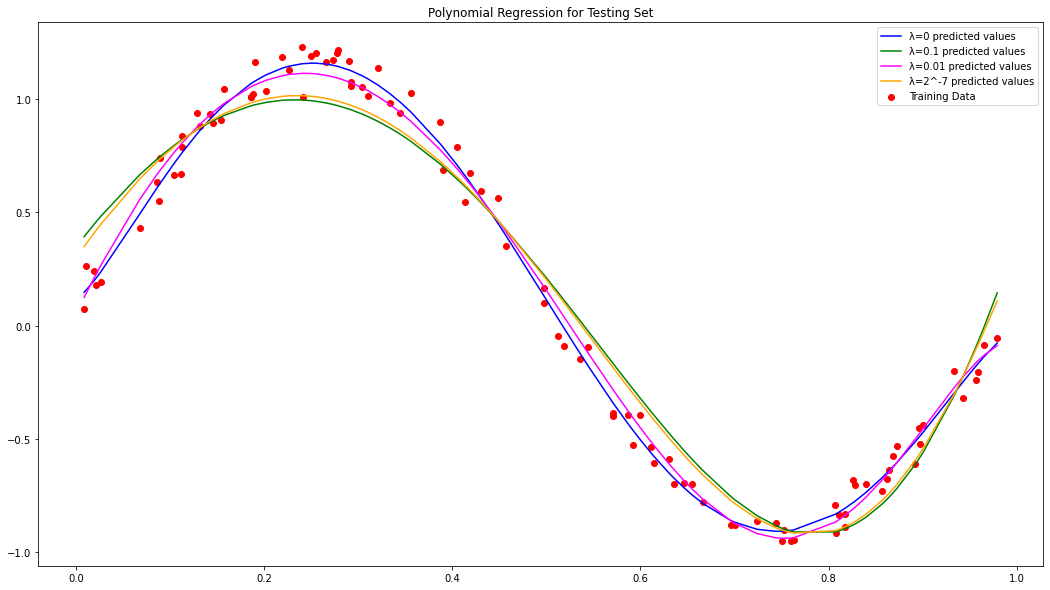

In [120]:
y_predicted_m9_0, y_predicted_m9_01, y_predicted_m9_001, y_predicted_m9_27 = [], [], [], []
X = X_train

for val in X:
  y0_val = 0
  y01_val = 0
  y001_val = 0
  y27_val = 0

  for deg in range(9, -1, -1):
    y0_val += reg_LSP_ord_9_0[0][deg] * math.pow(val, deg)
    y01_val += reg_LSP_ord_9_01[0][deg] * math.pow(val, deg)
    y001_val += reg_LSP_ord_9_001[0][deg] * math.pow(val, deg)
    y27_val += reg_LSP_ord_9_27[0][deg] * math.pow(val, deg)
  y_predicted_m9_0.append(y0_val)
  y_predicted_m9_01.append(y01_val)
  y_predicted_m9_001.append(y001_val)
  y_predicted_m9_27.append(y27_val)

# Sorting the data to plot line graph
test_data = pd.DataFrame(data=(X_test, Y_test),index=['X_test', 'Y_test']).T.sort_values(by='X_test')
df_predicted_m9_0 = pd.DataFrame(data=(X, y_predicted_m9_0),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_01 = pd.DataFrame(data=(X, y_predicted_m9_01),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_001 = pd.DataFrame(data=(X, y_predicted_m9_001),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_27 = pd.DataFrame(data=(X, y_predicted_m9_27),index=['X', 'Y_predicted']).T.sort_values(by='X')


# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 1, figsize=(18, 10))
axes.scatter(X_train, Y_train, color='red')
axes.plot(df_predicted_m9_0['X'], df_predicted_m9_0['Y_predicted'], color='blue')
axes.plot(df_predicted_m9_01['X'], df_predicted_m9_01['Y_predicted'], color='green')
axes.plot(df_predicted_m9_001['X'], df_predicted_m9_001['Y_predicted'], color='magenta')
axes.plot(df_predicted_m9_27['X'], df_predicted_m9_27['Y_predicted'], color='orange')
axes.legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.01 predicted values', 'λ=2^-7 predicted values', 'Training Data'])
axes.set_title('Polynomial Regression for Testing Set')

## NMSE (Normalized Mean Square Error)

## RMSE (Root Mean Square error)

In [78]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0['Y_predicted']), Y_test),index=['y predicted m9 λ0','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0 = 0

rmse_m9_λ0 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0 = math.sqrt(rmse_m9_λ0)
rmse_m9_λ0

0.7717453456880293

In [79]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_01['Y_predicted']), Y_test),index=['y predicted m9 λ01','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ01'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ01 = 0

rmse_m9_λ01 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ01 = math.sqrt(rmse_m9_λ01)
rmse_m9_λ01

0.7267111021776478

In [80]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_001['Y_predicted']), Y_test),index=['y predicted m9 λ001','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ001'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ001 = 0

rmse_m9_λ001 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ001 = math.sqrt(rmse_m9_λ001)
rmse_m9_λ001

0.7618926476117067

In [81]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_test),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ27 = 0

rmse_m9_λ27 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27 = math.sqrt(rmse_m9_λ27)
rmse_m9_λ27

0.7319484617174016

## MAE (Mean Absolute Error)

In [82]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0['Y_predicted']), Y_train),index=['y predicted m9 λ0','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ0'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ0 = 0
rmse_m9_λ0 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0

0.7942578526162793

In [83]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_01['Y_predicted']), Y_train),index=['y predicted m9 λ01','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ01'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ01 = 0
rmse_m9_λ01 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ01

0.7874538756717803

In [84]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_001['Y_predicted']), Y_train),index=['y predicted m9 λ001','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ001'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ01 = 0
rmse_m9_λ01 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ01

0.7913753102435188

In [85]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ27 = 0
rmse_m9_λ27 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27

0.7879839929373579

## R2 (R-square Error)

In [141]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0['Y_predicted']), Y_train),index=['y predicted m9 λ0','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ0'] - y_mean)**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

1.0065797502007632

In [140]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_01['Y_predicted']), Y_train),index=['y predicted m9 λ01','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ01'] - y_mean)**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ01 = SSR/SST
R_square_λ01

1.1275809475948764

In [142]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_001['Y_predicted']), Y_train),index=['y predicted m9 λ001','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ001'] - y_mean)**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ001 = SSR/SST
R_square_λ001

1.0299198663563123

In [143]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ27','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ27'] - y_mean)**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

1.113102458058596

# GRADIENT MATRIX

In [90]:
no_of_rows = len(X_train)
no_of_cols = 10

Lambda = math.pow(2, -7)
X_Lam0 = np.zeros((no_of_rows, no_of_cols))
lam_I = np.identity(10)*Lambda
for xi in range (no_of_rows):
  for deg in range (no_of_cols):
    X_Lam0[xi][deg] += math.pow(X_train[xi], deg)

print('X_Lam0.0001: ')
print(X_Lam0001)

X_Lam0.0001: 


NameError: ignored